# fun_control_init

In [ ]:
from spotPython.utils.init import fun_control_init
fun_control = fun_control_init(_L_in=64, _L_out=11, num_workers=0, device=None)
fun_control

In [ ]:
import pandas as pd

def class_attributes_to_dataframe(class_obj):
    # Get the attributes and their values of the class object
    attributes = [attr for attr in dir(class_obj) if not callable(getattr(class_obj, attr)) and not attr.startswith("__")]
    values = [getattr(class_obj, attr) for attr in attributes]
    
    # Create a DataFrame from the attributes and values
    df = pd.DataFrame({'Attribute Name': attributes, 'Attribute Value': values})
    
    return df

# Example usage:
class MyClass:
    def __init__(self):
        self.name = "John"
        self.age = 30
        self.salary = 50000

my_instance = MyClass()
df = class_attributes_to_dataframe(my_instance)
print(df)



In [ ]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
# number of initial points:
ni = 7
# number of points
n = 10

fun = analytical().fun_sphere
lower = np.array([-1])
upper = np.array([1])
design_control={"init_size": ni}

spot_1 = spot.Spot(fun=fun,
            lower = lower,
            upper= upper,
            fun_evals = n,
            show_progress=True,
            design_control=design_control,)
spot_1.run()


In [ ]:
from sys import stdout
df = spot_1.class_attributes_to_dataframe()
stdout.write(df.to_string())

In [ ]:
from river import datasets
from river import evaluate
from river.linear_model import LogisticRegression
from river import metrics
from river import optim
from river import preprocessing

dataset = datasets.Phishing()

model = (
    preprocessing.StandardScaler() |
    LogisticRegression()
)

metric = metrics.Accuracy()

evaluate.progressive_val_score(dataset, model, metric)


# Load CSV

In [ ]:
from spotPython.data.csvdataset import CSVDataset
# dataset = CSVDataset(csv_file='./data/spotPython/data.csv', target_column='prognosis')
dataset = CSVDataset(target_column='prognosis')
print(dataset.data.shape)
print(dataset.targets.shape)            

In [ ]:
dataset.extra_repr()

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 3
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# CSV Data set VBDP

In [ ]:
# load the csv_file='./data/spotPython/data.csv' as a pandas df and save it as a pickle file
import pandas as pd
df = pd.read_csv('./data/spotPython/data.csv')
df.to_pickle('./data/spotPython/data.pkl')


In [ ]:
from spotPython.data.csvdataset import CSVDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# PyHcf


In [ ]:
from pyhcf.data.daten_sensitive import DatenSensitive
from pyhcf.utils.names import get_short_parameter_names
daten = DatenSensitive()
df = daten.load()
names =  df.columns
names = get_short_parameter_names(names)
# rename columns with short names
df.columns = names
df.head()
# save the df as a csv file
df.to_csv('./data/spotPython/data_sensitive.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotPython/data_sensitive.pkl')
# remove all rows with NaN values
df = df.dropna()
# save the df as a csv file
df.to_csv('./data/spotPython/data_sensitive_rmNA.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotPython/data_sensitive_rmNA.pkl')


# PyHcf data loading

In [ ]:
# from spotPython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotPython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
# from spotPython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotPython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

# Pickle data loading

In [ ]:
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset.feature_type

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Data Sensitive

In [ ]:
from spotPython.light.pkldataset import PKLDataset
import torch
dataset = PKLDataset(pkl_file='./data/spotPython/data_sensitive.pkl', target_column='A', feature_type=torch.long, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Test lightdatamodule

In [ ]:
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
# dataset = PKLDataset(directory="./data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
print(len(dataset))

In [ ]:
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=7)

In [ ]:
data_module.setup()

In [ ]:
print(f"Training set size: {len(data_module.data_train)}")

In [ ]:
print(f"Validation set size: {len(data_module.data_val)}")

In [ ]:
print(f"Test set size: {len(data_module.data_test)}")

# Set the DataModule in fun_control 

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_data_module
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
from spotPython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=7)
dm.setup()
set_data_module(fun_control=fun_control,
                data_module=dm)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same with the sensitive data set

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_data_module
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_data_module(fun_control=fun_control,
                data_module=dm)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same, but VBDO data set

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_data_module
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/VBDP/", filename="train.csv",target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_data_module(fun_control=fun_control,
                data_module=dm)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


# load Hyperdict

In [ ]:
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
lhd = LightHyperDict()
lhd.hyper_dict
user_lhd = LightHyperDict(filename="user_hyper_dict.json", directory="./hyperdict/")
user_lhd.hyper_dict


# Diabetes data set

In [ ]:
from sklearn.datasets import load_diabetes  
import torch

# Load the diabetes dataset
feature_df, target_df = load_diabetes(return_X_y=True, as_frame=True)
feature_tensor = torch.tensor(feature_df.values, dtype=torch.float32)
target_tensor = torch.tensor(target_df.values, dtype=torch.float32)
feature_tensor


In [ ]:
from spotPython.data.diabetes import Diabetes
dataset = Diabetes()
print(dataset.data.shape)
print(dataset.targets.shape)

# add core model to fun control

In [ ]:
from spotPython.light.netlightregressione import NetLightRegression
from spotPython.utils.init import fun_control_init
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
fun_control["core_model"].__name__

In [ ]:
# check if the fun_control["core_model_hyper_dict"] is a LightHyperDict
isinstance(fun_control["core_model_hyper_dict"], dict)

# test check_X_shape

In [ ]:
import numpy as np
from spotPython.utils.init import fun_control_init
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.fun.hyperlight import HyperLight
from spotPython.hyperparameters.values import get_var_name
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
n_hyperparams = len(get_var_name(fun_control))
# generate a random np.array X with shape (2, n_hyperparams)
X = np.random.rand(2, n_hyperparams)
X == hyper_light.check_X_shape(X, fun_control)





# Test hyperlight fun

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotPython.fun.hyperlight import HyperLight
from spotPython.data.diabetes import Diabetes
from spotPython.hyperparameters.values import set_data_set
import numpy as np
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)

dataset = Diabetes()
set_data_set(fun_control=fun_control,
                data_set=dataset)

add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
X = get_default_hyperparameters_as_array(fun_control)
# combine X and X to a np.array with shape (2, n_hyperparams)
X = np.vstack((X, X))
y = hyper_light.fun(X, fun_control)
y


# test  NetLightRegression Class

In [ ]:
from torch.utils.data import DataLoader
from spotPython.data.diabetes import Diabetes
from spotPython.light.netlightregression import NetLightRegression
from torch import nn
import lightning as L
PATH_DATASETS = './data'
BATCH_SIZE = 8

dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader)) 
print(batch_x.shape)
print(batch_y.shape)

net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adam', dropout_prob=0.1, lr_mult=0.1,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)


# tests optimizer_handler

In [ ]:
from torch.utils.data import DataLoader
from spotPython.data.diabetes import Diabetes
from spotPython.light.netlightregression import NetLightRegression
from torch import nn
import lightning as L

BATCH_SIZE = 8
lr_mult=0.1

dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adam', dropout_prob=0.1, lr_mult=lr_mult,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
# Adam uses a lr which is calculated as lr=lr_mult * 0.001, so this value
# should be 0.1 * 0.001 = 0.0001 
trainer.optimizers[0].param_groups[0]["lr"] == lr_mult*0.001


net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adadelta', dropout_prob=0.1, lr_mult=lr_mult,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
# Adadelta uses a lr which is calculated as lr=lr_mult * 1.0, so this value
# should be 1.0 * 0.1 = 0.1 
trainer.optimizers[0].param_groups[0]["lr"] == lr_mult*1.0


# Test train_model

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotPython.data.diabetes import Diabetes
from spotPython.hyperparameters.values import set_data_set
from spotPython.hyperparameters.values import get_var_name, assign_values, generate_one_config_from_var_dict
from spotPython.light.traintest import train_model, test_model
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)

dataset = Diabetes()
set_data_set(fun_control=fun_control,
                data_set=dataset)

add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
var_dict = assign_values(X, get_var_name(fun_control))
for config in generate_one_config_from_var_dict(var_dict, fun_control):
    y_train = train_model(config, fun_control)
    y_test = test_model(config, fun_control)
    break
print(y_train)
print(y_test[0])


In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotPython.data.diabetes import Diabetes
from spotPython.hyperparameters.values import set_data_set
from spotPython.hyperparameters.values import get_var_name, assign_values, generate_one_config_from_var_dict
from spotPython.light.traintest import test_model


def test_traintest_test_model():
    fun_control = fun_control_init(
        _L_in=10,
        _L_out=1,)

    dataset = Diabetes()
    set_data_set(fun_control=fun_control,
                    data_set=dataset)

    add_core_model_to_fun_control(core_model=NetLightRegression,
                                fun_control=fun_control,
                                hyper_dict=LightHyperDict)
    X = get_default_hyperparameters_as_array(fun_control)
    var_dict = assign_values(X, get_var_name(fun_control))
    for vals in generate_one_config_from_var_dict(var_dict, fun_control):
        y_test = test_model(test_config=vals,
                            fun_control=fun_control)
        break
    # check if y is a float

# test getVarName()

In [ ]:
from spotPython.hyperparameters.values import get_var_name
fun_control = {"core_model_hyper_dict":{
            "leaf_prediction": {
                "levels": ["mean", "model", "adaptive"],
                "type": "factor",
                "default": "mean",
                "core_model_parameter_type": "str"},
            "leaf_model": {
                "levels": ["linear_model.LinearRegression", "linear_model.PARegressor", "linear_model.Perceptron"],
                "type": "factor",
                "default": "LinearRegression",
                "core_model_parameter_type": "instance"},
            "splitter": {
                "levels": ["EBSTSplitter", "TEBSTSplitter", "QOSplitter"],
                "type": "factor",
                "default": "EBSTSplitter",
                "core_model_parameter_type": "instance()"},
            "binary_split": {
                "levels": [0, 1],
                "type": "factor",
                "default": 0,
                "core_model_parameter_type": "bool"},
            "stop_mem_management": {
                "levels": [0, 1],
                "type": "factor",
                "default": 0,
                "core_model_parameter_type": "bool"}}}
len(get_var_name(fun_control))

# Test netlightregression

In [1]:
import torch
import numpy as np
from spotPython.spot import spot
from math import inf
from spotPython.utils.init import fun_control_init
from spotPython.utils.file import get_experiment_name, get_spot_tensorboard_path
from spotPython.utils.device import getDevice
from spotPython.hyperparameters.values import set_data_set
from spotPython.data.pkldataset import PKLDataset
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.hyperparameters.values import modify_hyper_parameter_bounds
from spotPython.hyperparameters.values import modify_hyper_parameter_levels
from spotPython.fun.hyperlight import HyperLight
from spotPython.hyperparameters.values import (get_bound_values,
    get_var_name,
    get_var_type,)
from spotPython.utils.eda import gen_design_table
from spotPython.hyperparameters.values import get_tuned_architecture
from spotPython.light.testmodel import test_model
from spotPython.light.loadmodel import load_light_from_checkpoint

MAX_TIME = 1
INIT_SIZE = 5
WORKERS = 0
PREFIX="031"

experiment_name = get_experiment_name(prefix=PREFIX)
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    num_workers=WORKERS,
    device=getDevice(),
    _L_in=133,
    _L_out=1,
    TENSORBOARD_CLEAN=True)

dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True)
set_data_set(fun_control=fun_control,
                data_set=dataset)



add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
modify_hyper_parameter_bounds(fun_control, "l1", bounds=[5,8])
modify_hyper_parameter_bounds(fun_control, "epochs", bounds=[3,5])
modify_hyper_parameter_bounds(fun_control, "batch_size", bounds=[2, 8])
modify_hyper_parameter_levels(fun_control, "optimizer",["Adam", "AdamW", "Adamax", "NAdam"])

print(gen_design_table(fun_control))

var_type = get_var_type(fun_control)
var_name = get_var_name(fun_control)
lower = get_bound_values(fun_control, "lower")
upper = get_bound_values(fun_control, "upper")
fun = HyperLight(log_level=50).fun
spot_tuner = spot.Spot(fun=fun,
                       log_level=50,
                   lower = lower,
                   upper = upper,
                   fun_evals = inf,
                   max_time = MAX_TIME,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type = var_type,
                   var_name = var_name,
                   show_progress= True,
                   fun_control = fun_control,
                   design_control={"init_size": INIT_SIZE},
                   surrogate_control={"noise": True,
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": len(var_name),
                                      "model_fun_evals": 10_000,
                                      })
spot_tuner.run()

Seed set to 42
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes  | Out sizes
--------------------------------------------------------------
0 | layers | Sequential | 92.0 K | [32, 133] | [32, 1]  
--------------------------------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)


| name           | type   | default   |   lower |   upper | transform             |
|----------------|--------|-----------|---------|---------|-----------------------|
| l1             | int    | 3         |     5   |    8    | transform_power_2_int |
| epochs         | int    | 4         |     3   |    5    | transform_power_2_int |
| batch_size     | int    | 4         |     2   |    8    | transform_power_2_int |
| act_fn         | factor | ReLU      |     0   |    5    | None                  |
| optimizer      | factor | SGD       |     0   |    3    | None                  |
| dropout_prob   | float  | 0.01      |     0   |    0.25 | None                  |
| lr_mult        | float  | 1.0       |     0.1 |   10    | None                  |
| patience       | int    | 2         |     2   |    6    | transform_power_2_int |
| initialization | factor | Default   |     0   |    2    | None                  |
Train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
GPU available: True (mps), used:

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric           166.65289306640625
        val_loss            166.65289306640625
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 166.65289306640625, 'hp_metric': 166.65289306640625}
Train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epochs=8` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric               668304256.0
        val_loss                668304256.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 668304256.0, 'hp_metric': 668304256.0}
Train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (48) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes  | Out sizes
--------------------------------------------------------------
0 | layers | Sequential | 12.3 K | [16, 133] | [16, 1]  
--------------------------------------------------------------
12.3 K    Trainable params
0         Non-trainable params
12.3 K    Total params
0.049     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric           103.12089538574219
        val_loss            103.12089538574219
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 103.12089538574219, 'hp_metric': 103.12089538574219}
Train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (24) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes  | Out sizes
--------------------------------------------------------------
0 | layers | Sequential | 12.3 K | [64, 133] | [64, 1]  
--------------------------------------------------------------
12.3 K    Trainable params
0         Non-trainable params
12.3 K    Total params
0.049     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric                   nan
        val_loss                    nan
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': nan, 'hp_metric': nan}
Train_model(): Test set size: 1429


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            12587.4541015625
        val_loss             12587.4541015625
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 12587.4541015625, 'hp_metric': 12587.4541015625}


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes  | Out sizes
--------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [32, 133] | [32, 1]  
--------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which

Train_model(): Test set size: 1429
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric           188.98924255371094
        val_loss            188.98924255371094
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 188.98924255371094, 'hp_metric': 188.98924255371094}
spotPython tuning: 103.12089538574219 [#---------] 7.52% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes  | Out sizes
--------------------------------------------------------------
0 | layers | Sequential | 92.0 K | [64, 133] | [64, 1]  
--------------------------------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which

Train_model(): Test set size: 1429
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric             22240.58203125
        val_loss              22240.58203125
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 22240.58203125, 'hp_metric': 22240.58203125}
spotPython tuning: 103.12089538574219 [#---------] 13.04% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 92.0 K | [4, 133] | [4, 1]   
-------------------------------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may

Train_model(): Test set size: 1429


`Trainer.fit` stopped: `max_epochs=32` reached.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric           170.81314086914062
        val_loss            170.81314086914062
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 170.81314086914062, 'hp_metric': 170.81314086914062}
spotPython tuning: 103.12089538574219 [#######---] 72.86% 


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 92.0 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
92.0 K    Trainable params
0         Non-trainable params
92.0 K    Total params
0.368     Total estimated model params size (MB)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may

Train_model(): Test set size: 1429


`Trainer.fit` stopped: `max_epochs=32` reached.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            117.1513442993164
        val_loss             117.1513442993164
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 117.1513442993164, 'hp_metric': 117.1513442993164}
spotPython tuning: 103.12089538574219 [##########] 100.00% Done...



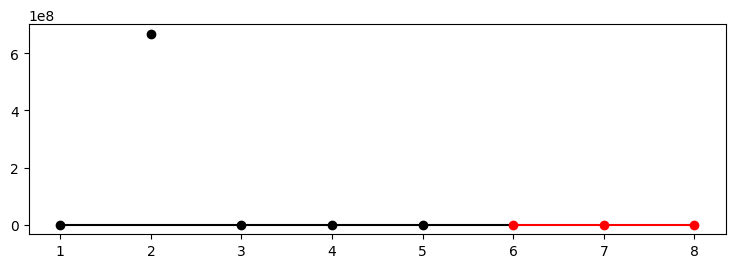

In [2]:
spot_tuner.plot_progress(log_y=False, filename=None)

In [3]:
print(gen_design_table(fun_control=fun_control, spot=spot_tuner))

| name           | type   | default   |   lower |   upper |               tuned | transform             |   importance | stars   |
|----------------|--------|-----------|---------|---------|---------------------|-----------------------|--------------|---------|
| l1             | int    | 3         |     5.0 |     8.0 |                 7.0 | transform_power_2_int |         0.00 |         |
| epochs         | int    | 4         |     3.0 |     5.0 |                 4.0 | transform_power_2_int |        65.94 | **      |
| batch_size     | int    | 4         |     2.0 |     8.0 |                 3.0 | transform_power_2_int |         0.00 |         |
| act_fn         | factor | ReLU      |     0.0 |     5.0 |                 5.0 | None                  |       100.00 | ***     |
| optimizer      | factor | SGD       |     0.0 |     3.0 |                 3.0 | None                  |         0.00 |         |
| dropout_prob   | float  | 0.01      |     0.0 |    0.25 | 0.22086376796923401 | N

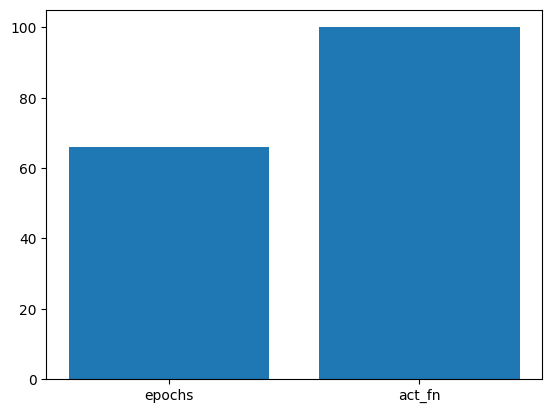

In [4]:
spot_tuner.plot_importance(threshold=0.025, filename=None)

In [5]:
config = get_tuned_architecture(spot_tuner, fun_control)
print(config)

{'l1': 128, 'epochs': 16, 'batch_size': 8, 'act_fn': Swish(), 'optimizer': 'NAdam', 'dropout_prob': 0.22086376796923401, 'lr_mult': 7.65501078489161, 'patience': 64, 'initialization': 'Xavier'}


In [6]:
test_model(config, fun_control)

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            160.7113494873047
        val_loss             160.7113494873047
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
test_model result: {'val_loss': 160.7113494873047, 'hp_metric': 160.7113494873047}


(160.7113494873047, 160.7113494873047)

In [7]:
model_loaded = load_light_from_checkpoint(config, fun_control)

config: {'l1': 128, 'epochs': 16, 'batch_size': 8, 'act_fn': Swish(), 'optimizer': 'NAdam', 'dropout_prob': 0.22086376796923401, 'lr_mult': 7.65501078489161, 'patience': 64, 'initialization': 'Xavier'}
Loading model with 4636678196624067921_TEST from runs/saved_models/4636678196624067921_TEST/last.ckpt
Model: NetLightRegression(
  (layers): Sequential(
    (0): Linear(in_features=133, out_features=128, bias=True)
    (1): Swish()
    (2): Dropout(p=0.22086376796923401, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Swish()
    (5): Dropout(p=0.22086376796923401, inplace=False)
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): Swish()
    (8): Dropout(p=0.22086376796923401, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): Swish()
    (11): Dropout(p=0.22086376796923401, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [8]:
model_loaded

NetLightRegression(
  (layers): Sequential(
    (0): Linear(in_features=133, out_features=128, bias=True)
    (1): Swish()
    (2): Dropout(p=0.22086376796923401, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Swish()
    (5): Dropout(p=0.22086376796923401, inplace=False)
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): Swish()
    (8): Dropout(p=0.22086376796923401, inplace=False)
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): Swish()
    (11): Dropout(p=0.22086376796923401, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)

epochs:  65.94373914777391
act_fn:  100.0


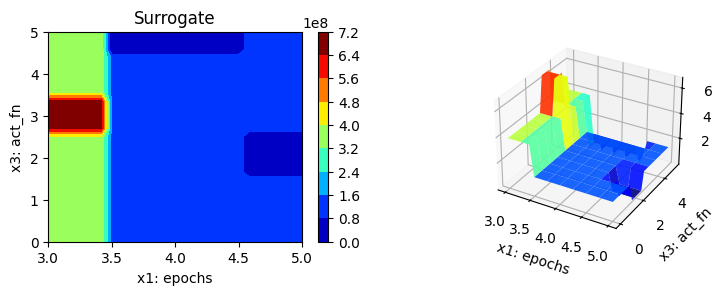

In [9]:
spot_tuner.plot_important_hyperparameter_contour(filename=None)

In [10]:
spot_tuner.parallel_plot()

In [11]:
from spotPython.light.cvmodel import cv_model
# set the number of folds to 10
fun_control["k_folds"] = 10
cv_model(config, fun_control)

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:198: UserWarning:

Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


k: 0
Train Dataset Size: 2142
Val Dataset Size: 239


/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: PossibleUserWarning:

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.11/site-packages/lightning/pytorch/ca

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            74.78556823730469
        val_loss             74.78556823730469
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 74.78556823730469, 'hp_metric': 74.78556823730469}
k: 1
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            71.45740509033203
        val_loss             71.45740509033203
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 71.45740509033203, 'hp_metric': 71.45740509033203}
k: 2
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            547.7097778320312
        val_loss             547.7097778320312
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 547.7097778320312, 'hp_metric': 547.7097778320312}
k: 3
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            248.4527130126953
        val_loss             248.4527130126953
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 248.4527130126953, 'hp_metric': 248.4527130126953}
k: 4
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            55.19939422607422
        val_loss             55.19939422607422
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 55.19939422607422, 'hp_metric': 55.19939422607422}
k: 5
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric           250.03848266601562
        val_loss            250.03848266601562
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 250.03848266601562, 'hp_metric': 250.03848266601562}
k: 6
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric           233.09481811523438
        val_loss            233.09481811523438
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 233.09481811523438, 'hp_metric': 233.09481811523438}
k: 7
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            259.8905944824219
        val_loss             259.8905944824219
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 259.8905944824219, 'hp_metric': 259.8905944824219}
k: 8
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type       | Params | In sizes | Out sizes
-------------------------------------------------------------
0 | layers | Sequential | 31.7 K | [8, 133] | [8, 1]   
-------------------------------------------------------------
31.7 K    Trainable params
0         Non-trainable params
31.7 K    Total params
0.127     Total estimated model params size (MB)


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            740.4092407226562
        val_loss             740.4092407226562
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 740.4092407226562, 'hp_metric': 740.4092407226562}
k: 9
Train Dataset Size: 2143
Val Dataset Size: 238


`Trainer.fit` stopped: `max_epochs=16` reached.


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        hp_metric            265.0440368652344
        val_loss             265.0440368652344
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
train_model result: {'val_loss': 265.0440368652344, 'hp_metric': 265.0440368652344}


274.608203125